In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Function definitions

In [3]:
from sklearn.datasets import load_files

def load_train_data():
    
    '''Load data from csv files, Train data, Splits data into X (feature matrix) and y (labels), 
    then returns: X_train, y_train'''
    
    ig_train=pd.read_csv(r"C:\Users\anabh\Downloads\train.csv")
    x_train=ig_train.drop(columns='isFake')
    y_train=ig_train['isFake']
    return x_train, y_train

In [4]:
def load_test_data():
   
    ''' Load data from csv files, Train and Test data 
        Splits data into X (feature matrix) and y (labels)
        
        returns: X_test, y_test
        
    '''
    
    ig_test=pd.read_csv(r"C:\Users\anabh\Downloads\test.csv")
    x_test=ig_test.drop(columns='isFake')
    y_test=ig_test['isFake']
    return x_test, y_test

In [5]:
from sklearn.model_selection import cross_validate
def get_classifier_cv_score(model, x, y, scoring='accuracy', cv=7):
    '''Calculate train and validation score of classifier (model) using cross-validation
        
        
        model (sklearn classifier): Classifier to train and evaluate
        X (numpy.array or pandas.DataFrame): Feature matrix
        y (numpy.array or pandas.Series): Target vector
        scoring (str): a scoring string accepted by sklearn.metrics.cross_validate()
        cv (int): number of cross-validation folds see sklearn.metrics.cross_validate()
        
        returns: mean training score, mean validation score
    
    '''
    
    scores=cross_validate(model, x, y, cv=cv, scoring=scoring, return_train_score=True)
    train_scores=scores['train_score']
    val_scores=scores['test_score']
    train_mean=np.mean(train_scores)
    val_mean=np.mean(val_scores)
    return train_mean, val_mean

In [6]:
def print_grid_search_result(grid_search): 
    #implement function body
    
    print(grid_search.best_params_)
    
    best_train=grid_search.cv_results_["mean_train_score"][grid_search.best_index_]
    print("best mean_train_score: {:.3f}".format(best_train))
    
    best_test=grid_search.cv_results_["mean_test_score"][grid_search.best_index_]
    print("best mean_test_score: {:.3f}".format(best_test))
    
#The above code prints best parameters and mean training and validation scores of a grid search object. grid_search (sklearn GridSearchCV): Fitted GridSearchCV object, scores are printed with 3 decimal places.

In [7]:
#plot confusion matrix heatmap for final result
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_actual, y_pred, labels, title=''):
    
    cmap=sns.color_palette("dark:salmon_r", as_cmap=True) 
    data=confusion_matrix(y_actual, y_pred)
    ax=sns.heatmap(data, annot=True, cbar=False, cmap=cmap, fmt='d', xticklabels=labels, yticklabels=labels)
     #cmap:the mapping from data values to color space
    #annot: Set to True, to write data values in each cell(annotation)
    #cbar: Set to false so that color bar is not drawn
    #fmt: string formatting code used while using annotation
    #xticklabels, yticklabels: to plot alternate labels as xticklabels
    ax.set_title(title)
    ax.set_xlabel("predicted values")
    ax.set_ylabel("actual values")

In [8]:
# The above code is used to create a heatmap plot of the confusion matrix.
    
       #y_actual (pandas.DataSeries or numpy.Array): Ground truth label vector
        #y_pred (pandas.DataSeries or numpy.Array): Predicted label vector
        #labels (list(str)): Class names used for plotting (ticklabels)
        #title (str): Plot title
        
        #uses sklearn.metrics.confusion_matrix

In [9]:
#Load data

In [10]:
x_data, y_data=load_train_data()
print(x_data.info()) #to view the attributes of the data frame created from train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11998 entries, 0 to 11997
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   comment_count  11998 non-null  int64
 1   retweet_count  11998 non-null  int64
 2   post_length    11998 non-null  int64
 3   amount_digits  11998 non-null  int64
 4   like_count     11998 non-null  int64
 5   post_date      11998 non-null  int64
dtypes: int64(6)
memory usage: 562.5 KB
None


In [11]:
x_data.head() #returns the first 5 rows of the dataframe

,comment_count,retweet_count,post_length,amount_digits,like_count,post_date
0,6,0,67,0,0,223820
1,4,0,49,0,3,361015
2,12,0,161,3,1,2784
3,0,0,28,0,0,33919
4,0,0,86,3,0,21920


In [12]:
print("size: ", x_data.shape, "Type: ", type(x_data))#type() returns the datatype
print("size: ", y_data.shape, "Type: ", type(y_data))#shape returns a tuple with each index havinh the number of corresponding elements

size:  (11998, 6) Type:  <class 'pandas.core.frame.DataFrame'>
size:  (11998,) Type:  <class 'pandas.core.series.Series'>


In [13]:
#In the above output, 576 is the no of array dimensions, and each dimension has 11 elements. The datatype is dataframe

In [14]:
#Inspecting data:
#Checking correlation in features

Text(0.5, 1.0, 'Correlation Heatmap Between Features')

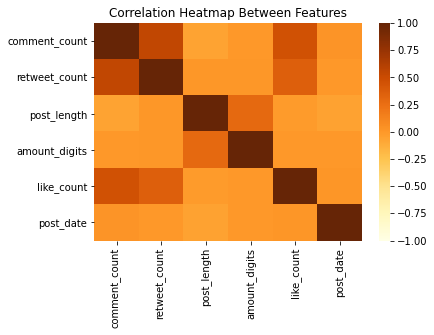

In [15]:
data_corr=x_data.corr(method='pearson')#corr() is used to find the pairwise correlation of all the columns in the dataframe, pearson method is used to find standard correlation coefficient.
ax=sns.heatmap(data_corr, vmin=-1, vmax=1, cmap='YlOrBr')#vmin, vmax are values to anchor the colormap
ax.set_title("Correlation Heatmap Between Features")

In [16]:
#There is no correlation among the features, they are roughly around 0 in each feature comparison, except for follows and profile pic, i.e. diagonal values are 1.

In [17]:
#Missing any values

In [18]:
print(x_data.isnull().sum())#removing 0 values

comment_count    0
retweet_count    0
post_length      0
amount_digits    0
like_count       0
post_date        0
dtype: int64


In [19]:
#the features are all filled out and we do not need to modify the existing data

In [20]:
#Checking if Imbalance in Labels

In [21]:
unique, freq=np.unique(y_data, return_counts=True)#unique(), to find unique elements in an array, retuen_counts is set to True, so that it returns the number of times each unique itrem appeared in the dataframe

for i, j in zip(unique, freq): #zip() creates an iterator where the first item in each passed iterator is paired together, and so on
    print("Label: ", i, ", Frequency: ", j)

Label:  0 , Frequency:  5399
Label:  1 , Frequency:  6599


In [22]:
#The labels is about 1:1 which means there is no imbalance in the labels.

In [23]:
#Create training and test sets(subsets)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x_data, y_data, test_size=0.2, random_state=37)#size of testing dataset is specified, randomization is controlled while splitting using random_state

In [25]:
print(y_train.shape)#prints the no of dimensions and its elements 
print(x_train.shape)

(9598,)
(9598, 6)


In [26]:
#Compare Models Using Cross-Validation

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

model_list=[LogisticRegression(max_iter=600),
           SVC(),
           GaussianNB(),
           RandomForestClassifier(random_state=55),
           GradientBoostingClassifier(random_state=56)]
#In logistic regression, the maximum number of iterations taken for solvers to converge is set to 600, by using max_iter

train_scores=[] #empty lists
val_scores=[]

for model in model_list:
    train, val=get_classifier_cv_score(model, x_train, y_train, 'average_precision') #average_presision is used to measure the accuracy of predictions
    train_scores.append(train)
    val_scores.append(val)
    
models_score=sorted(list(zip(val_scores, train_scores, model_list)), reverse=True) 
#Setting reverse as True will sort the list of iterators in descending order
print("----------------------------------------------") 
for val, train, model in models_score:
    print("Model: {} ".format(model.__class__.__name__))#prints the classifier names
    
    print("train_score: {:.3f} ".format(train))#prints train score after performing the above operations
    
    print("validation_score: {:.3f} ".format(val))#prints validation score after performing the above operations
    
    print("-------------------------------------------")

----------------------------------------------
Model: GradientBoostingClassifier 
train_score: 0.982 
validation_score: 0.978 
-------------------------------------------
Model: RandomForestClassifier 
train_score: 1.000 
validation_score: 0.974 
-------------------------------------------
Model: SVC 
train_score: 0.855 
validation_score: 0.855 
-------------------------------------------
Model: GaussianNB 
train_score: 0.585 
validation_score: 0.586 
-------------------------------------------
Model: LogisticRegression 
train_score: 0.565 
validation_score: 0.565 
-------------------------------------------


In [ ]:
#Best 2 models are selected i.e. Random Forest Classifier and Gradient Boosting Classifier.

In [ ]:
#Hyperparameter Tuning Using Grid Search

In [ ]:
#Grid Search for RandomForestClassifier

In [28]:
from sklearn.model_selection import GridSearchCV
import os

model=RandomForestClassifier(random_state=55)#To check that the results are stable across a number of different distinct random seeds.
parameters={'n_estimators': [600, 1000, 1200, 1500], 'max_depth': [9, 11, 13, 15]} #declaring a dictionary with random keys
grid1=GridSearchCV(model, parameters, cv=7, scoring='average_precision', return_train_score=True)

In [29]:
grid1.fit(x_train, y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(random_state=55),
             param_grid={'max_depth': [9, 11, 13, 15],
                         'n_estimators': [600, 1000, 1200, 1500]},
             return_train_score=True, scoring='average_precision')

In [30]:
model=GradientBoostingClassifier(max_depth=5, random_state=56)
parameters={'n_estimators': [100, 150, 250], 'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]}
grid2=GridSearchCV(model, parameters, cv=7, scoring='average_precision', return_train_score=True)

In [31]:
grid2.fit(x_train, y_train)

GridSearchCV(cv=7,
             estimator=GradientBoostingClassifier(max_depth=5, random_state=56),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
                         'n_estimators': [100, 150, 250]},
             return_train_score=True, scoring='average_precision')

In [32]:
print_grid_search_result(grid2)

{'learning_rate': 0.1, 'n_estimators': 250}
best mean_train_score: 0.997
best mean_test_score: 0.982


In [33]:
print_grid_search_result(grid1)

{'max_depth': 15, 'n_estimators': 1500}
best mean_train_score: 0.997
best mean_test_score: 0.978


In [231]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline=Pipeline([('preprocessing', StandardScaler()), ('classifier', grid2.best_estimator_)]) #returns the best n_estimar and max_depth
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 GradientBoostingClassifier(max_depth=5, n_estimators=200,
                                            random_state=56))])

In [232]:
print("Test score: {:.3f}".format(pipeline.score(x_test, y_test)))#score() measures the accuracy of the model againts the test data(precision)

Test score: 0.936


In [ ]:
#Final evaluation(to do a final evaluation on a reserve data)

In [233]:
x_final, y_final = load_test_data()

In [234]:
from sklearn.metrics import classification_report
y_pred=pipeline.predict(x_final) #predict() enables to predict the labels of the data values on the basis of the trained model
print(classification_report(y_final, y_pred, target_names=["genuine", "fake"]))

              precision    recall  f1-score   support

     genuine       0.95      0.87      0.91       300
        fake       0.88      0.96      0.92       301

    accuracy                           0.92       601
   macro avg       0.92      0.92      0.91       601
weighted avg       0.92      0.92      0.91       601



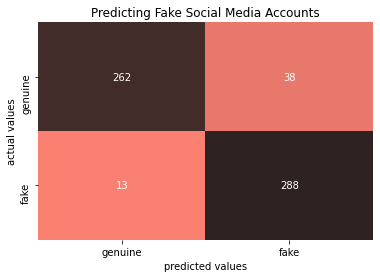

In [235]:
labels=["genuine", "fake"]
title="Predicting Fake Social Media Accounts"
plot_confusion_matrix(y_final, y_pred, labels, title)

In [236]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipeline=Pipeline([('preprocessing', StandardScaler()), ('classifier', grid1.best_estimator_)]) #returns the best n_estimar and max_depth
pipeline.fit(x_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 RandomForestClassifier(max_depth=13, n_estimators=700,
                                        random_state=55))])

In [237]:
print("Test score: {:.3f}".format(pipeline.score(x_test, y_test)))

Test score: 0.927


In [238]:
x_final, y_final = load_test_data()

In [239]:
from sklearn.metrics import classification_report
y_pred=pipeline.predict(x_final) #predict() enables to predict the labels of the data values on the basis of the trained model
print(classification_report(y_final, y_pred, target_names=["genuine", "fake"]))

              precision    recall  f1-score   support

     genuine       0.96      0.89      0.92       300
        fake       0.90      0.96      0.93       301

    accuracy                           0.93       601
   macro avg       0.93      0.93      0.93       601
weighted avg       0.93      0.93      0.93       601



In [ ]:
#F1 score is the weighted avg of recall and precision, here it is 0.93, which is close to 1, which is the best value, and 0 is the worst value for F1 score
#Here, the F1 score of accuracy of grid 1, i.e, random forest classifier is 0.01 percent more than gradient boosting classifier. 
#So random forest classifier will be considered for final result

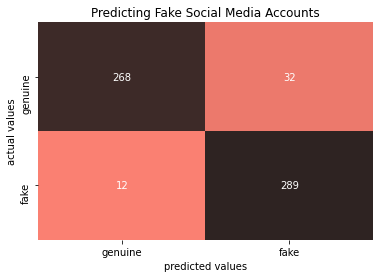

In [240]:
labels=["genuine", "fake"]
title="Predicting Fake Social Media Accounts"
plot_confusion_matrix(y_final, y_pred, labels, title)

In [34]:
#The model predicted around 93% fake accounts and 96% genuine accounts correctly
#The model only predicted 44 accounts wrong


In [35]:
best_train


NameError: name 'best_train' is not defined